In [1]:
import numba
import numpy as np


**Funciones de prueba:**

In [2]:
@numba.njit
def Sphere(arr):
    """
    Esta función recibe como parámetro un vector de n entradas, ingresado como un np.array,
    y devuelve el escalar que resulta de evaluar la función de la esfera en el vector.
    Se usa en el intervalo de búsqueda [-5.12, 5.12] y su óptimo global está en f([0,..,0])=0

    Ejemplo de uso:
        > Sphere(np.array([0, 0]))

        > 0
    """
    suma = 0.0  # Usar un float para la suma
    for x in arr:
        suma += x ** 2
    return suma

intervaloSphere = (-5.12, 5.12)


# Ejemplo de uso (y compilación AOT)
resultado = Sphere(np.array([1.0, 2.0, 3.0]))
print(resultado)


14.0


In [3]:
@numba.njit
def Ackley(arr):
    """
    Esta función recibe como parámetro un vector de n entradas, ingresado como un np.array,
    y devuelve el escalar que resulta de evaluar la función Ackley en el vector.
    Se usa en el intervalo de búsqueda [-30, 30] y su óptimo global está en f([0,..,0])=0.

    Ejemplo de uso:
        > Ackley(np.array([0, 0]))

        > 0
    """
    suma1 = 0.0
    suma2 = 0.0
    n = arr.shape[0]  # Usar el tamaño del array de NumPy
    for x in arr:
        suma1 += x ** 2
        suma2 += np.cos(2 * np.pi * x)
    
    # Calcular el resultado de la función Ackley
    term1 = 20 + np.exp(1) - 20 * np.exp(-0.2 * np.sqrt(suma1 / n))
    term2 = np.exp(suma2 / n)
    return term1 - term2

intervaloAckley = (-30, 30)

# Ejemplo de uso (y compilación AOT)
resultado = Ackley(np.array([0, 0]))
print(resultado)  # Debería imprimir un valor cercano a 0


-4.440892098500626e-16


In [4]:
@numba.njit
def Griewank(arr):
    """
    Esta función recibe como parámetro un vector de n entradas, ingresado como un np.array,
    y devuelve el escalar que resulta de evaluar la función Griewank en el vector.
    Se usa en el intervalo de búsqueda [-600, 600] y su óptimo global está en f([0,..,0])=0.

    Ejemplo de uso:
        > Griewank(np.array([0, 0]))

        > 0
    """
    suma = 0.0
    m = 1.0  # Inicializar en 1 para la multiplicación de cosenos
    n = arr.shape[0]  # Obtener el número de elementos en el array

    for i in range(1, n + 1):
        x_i = arr[i - 1]  # Acceder al elemento en el índice correspondiente
        suma += (x_i ** 2) / 4000.0  # Sumar la parte de la función
        m *= np.cos(x_i / np.sqrt(i))  # Multiplicar por el coseno

    return 1 + suma - m

intervaloGriewank = (-600, 600)

# Ejemplo de uso (y compilación AOT)
resultado = Griewank(np.array([0, 0]))
print(resultado)  # Debería imprimir 0.0


0.0


In [5]:
@numba.njit
def Rastrigin(arr):
    """
    Esta función recibe como parámetro un vector de n entradas, ingresado como un np.array,
    y devuelve el escalar que resulta de evaluar la función de Rastrigin en el vector.
    Tiene mínimo global en f([0,..,0]).

    Ejemplo de uso:
        > Rastrigin(np.array([2, 3, 6, 7]))

        > 98.0
    """
    n = arr.shape[0]  # Obtener el número de elementos en el array
    suma = 0.0

    for x in arr:
        suma += x ** 2 - 10 * np.cos(2 * np.pi * x)  # Calcular la suma de la función Rastrigin

    return 10 * n + suma  # Retornar el resultado final

intervaloRastrigin = (-5.12, 5.12)

# Ejemplo de uso (y compilación AOT)
resultado = Rastrigin(np.array([2, 3, 6, 7]))
print(resultado)  # Debería imprimir 98.0


98.0


In [6]:
@numba.njit
def Rosenbrock(x):
    """
    Esta función recibe como parámetro un vector de n entradas, ingresado como un array de NumPy
    y devuelve el escalar que resulta de evaluar la función de Rosenbrock en el vector.
    Tiene un mínimo global en f(1, ..., 1).

    Ejemplo de uso:
      > Rosenbrock(np.array([1, 1]))
      > 0
    """
    n = x.shape[0]  # Obtener el tamaño del array
    suma = 0.0
    for i in range(n - 1):
        suma += 100 * (x[i + 1] - (x[i]) ** 2) ** 2 + (x[i] - 1) ** 2
    return suma

intervaloRosenbrock = (-2.048, 2.048)

# Ejemplo de uso (y compilación AOT)
resultado = Rosenbrock(np.array([1, 1]))
print(resultado)  # Debería imprimir 0.0


0.0


**Funciones del algoritmo genético.**

In [7]:
kindividuos = 35 
dimension = 10
intervalo = intervaloRosenbrock
funcion = Rosenbrock
nBits = 20
nCortes = 15
probaMutacion = 0.5
iteraciones = 1000


In [8]:
'''Función que nos genera una población inicial de 2k individuos y 
   recibe como parámetros: La 'k' y el hipercubo al que pertenecen 
   los vectores (o sea, la dimensión 'n' y el intervalo [a,b] al que
   pertenecen cada una de las entradas de los vectores).'''

import numpy as np

@numba.njit
def Generar_Poblacion(k, n, intervalo):
    
   a, b = intervalo

   # Se genera una matriz de tamaño (2k, n) con valores aleatorios
   # uniformes (o sea, una población inicial de 2k individuos donde 
   # cada uno vive en Rn):
   poblacionMatriz = np.random.uniform(a,b, size=(2*k, n))
   

   return poblacionMatriz # No hacemos la conversión en lista de listas
                          # porque necesitamos de `numba`.


In [9]:
# Ejemplo de uso (y compilación AOT)

pob = Generar_Poblacion(kindividuos, dimension, intervalo)
print(pob[0])


[-0.15606423  1.87721468 -0.81434708 -0.67390823 -0.05958782 -1.54430562
 -0.34396503 -0.42592776  2.02577901  0.06399577]


In [10]:
'''Definimos una función de aptitud que recibe como parámetros una
   función de prueba y una población de 2k individuos y retorna una
   lista con las probabilidades de selección (p_i) de todos los 
   individuos de la población, el mejor individuo en la población,
   la mejor evaluación de éste y el promedio de las evaluaciones.'''


# `aptitud` es un parámetro opcional sólo para elegir qué retorna la 
# función.
@numba.njit
def Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion, aptitud=1):
    
    # Necesitamos el número de individuos de la población:
    numIndividuos = len(poblacion) 
    
    # Generamos un array con las evaluaciones en la función objetivo
    evaluaciones = np.empty(numIndividuos) # Primero generamos un array
                                           # vacío de tamaño adecuado.
    for i in range(numIndividuos):
        evaluaciones[i] = funcion(poblacion[i])

    # Generamos un array de las aptitudes de los individuos en la 
    # población.
    aptitudes = np.exp(1e-9 * (-evaluaciones))

    # Encontramos el índice del mejor individuo (menor evaluación)
    mejorIndice = np.argmax(aptitudes)
    masApto = poblacion[mejorIndice]

    # Obtenemos el 'tamaño del pastel':
    sumaAptitudes = np.sum(aptitudes)

    # Calculamos las probabilidades de selección (p_i) para todos los
    # individuos:
    probabilidades = aptitudes / sumaAptitudes

    # Inicializamos mejorEval y promedioEva
    mejorEval = np.nan
    promedioEval = np.nan

    # Si aptitud es distinto de 0, calculamos mejor aptitud y promedio de aptitudes
    if aptitud != 0:
        mejorEval = evaluaciones[mejorIndice]
        promedioEval = np.mean(evaluaciones)

    return probabilidades, masApto, mejorEval, promedioEval


In [11]:
# Ejemplo de uso (y compilación AOT)
probas, masApto, mejorEval, promedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, pob)

print(probas[0], masApto[0], mejorEval, promedioEval)


0.014285700169601602 -0.3762734764441953 610.2752270596579 4449.126777652091


In [12]:
'''Definimos una función que recibe la lista de probabilidades 
   de selección y nos retorna la que corresponde a la de las 
   probabilidades acumulativas.'''

@numba.njit
def Probas_Acumulativas(probabilidades):

    # Calculamos las probabilidades acumulativas (q_i) para todos los
    # individuos:
    probasAcumulativas = np.cumsum(probabilidades)

    return probasAcumulativas # Retornamos las `probasAcumulativas` como
                              # un arreglo de NumPy (igual es iterable).


In [13]:
# Ejemplo de uso (y compilación AOT)
qis = Probas_Acumulativas(probas)
print(qis[16])


0.24285714454635413


Padres mediante el uso de la ruleta:

In [14]:
'''Estas funciones son las que nos ayudan a generar a los padres mediante
   el uso de la ruleta.'''
   

'''La primera es para seleccionar padres (uno) y recibe como parámetro 
   la lista de las probabilidades acumulativas.
   
   Nos retornará el índice en la lista que le corresponde al padre 
   elegido con esa regla.'''

@numba.njit
def Seleccionar_Padre_Ruleta(probasAcumuladas):
   r = np.random.random() # Generamos un número aleatorio entre 0 y 1

   tol=1e-9
   
   # Recorremos las probabilidades acumuladas para seleccionar el padre
   for i in range(len(probasAcumuladas)):
      if r <= probasAcumuladas[i] or np.isclose(r, probasAcumuladas[i], atol=tol):
         return i  # Índice del individuo seleccionado
               
   return -1  # En caso de que no se seleccione, aunque esto no debería suceder.


In [15]:
'''La segunda es para generar la lista de padres elegidos para 
   reproducirse. Necesitamos 2k nuevos individuos, así que se van a 
   elegir k parejas (cada par de padres produce dos hijos).
   La función recibe como parámetros: la lista de individuos, las
   probabilidades acumulativas y un máximo de intentos para intentar evitar
   la generación de clones (en este caso, vamos a considerar un máximo
   de 100 para cada elección de un segundo padre, pero tenemos la 
   apertura de modificarlo después).
   Retorna la lista de parejas de padres elegidos.'''

@numba.njit
def Generar_Parejas(individuos, probasAcumuladas, maxIntentos=100):
    
    numIndividuos = len(individuos)

    # Validación: si no hay suficientes individuos
    if numIndividuos < 2:
        print("Error: No hay suficientes individuos para generar parejas.")
        return np.empty((0, 2, individuos.shape[1]))
        # Regresamos un array vacío

    # Como len(individuos) = 2k, le pedimos que elija len(individuos)/2 
    # parejas de padres.
    parejasNecesarias = numIndividuos // 2
    
    
    parejas_idxs = np.empty((parejasNecesarias, 2), dtype=np.int32)
    # Creamos un array para los índices de tamaño adecuado.
    # Como queremos parejas, el array tiene dos columnas, la idea es que
    # cada fila del array represente una pareja de padres.

    '''En otras palabras, `parejas_idxs` tendrá la forma:
       [[padre1_idx1, padre2_idx1],
       [padre1_idx2, padre2_idx2],
       [padre1_idx3, padre2_idx3],
       ...
       [padre1_idxN, padre2_idxN]]'''


    for i in range(parejasNecesarias):
        padre1_idx = Seleccionar_Padre_Ruleta(probasAcumuladas)

        intentos = 0
        while True:
            padre2_idx = Seleccionar_Padre_Ruleta(probasAcumuladas)
            if padre1_idx != padre2_idx:
                break  # Padres diferentes, salimos del ciclo
            intentos += 1 # No encontramos un padre distinto, hacemos 
                          # otro intento.
            if intentos >= maxIntentos: # Rebasamos los intentos que
                                        # teníamos permitidos.
                padre2_idx = padre1_idx # Aceptamos el clon.
                break

        parejas_idxs[i, 0] = padre1_idx # Primer padre se asigna en la
                                        # fila `i` de la primer columna.
        parejas_idxs[i, 1] = padre2_idx # Segundo padre se asigna en la
                                        # fila `i` de la segunda columna.

    # Ahora construimos el array de parejas usando los índices generados
    # para almacenar las parejas de individuos.
    parejas = np.empty((parejasNecesarias, 2, individuos.shape[1]), dtype=individuos.dtype)
    
    for i in range(parejasNecesarias):
        parejas[i, 0] = individuos[parejas_idxs[i, 0]]  # Primer padre
        parejas[i, 1] = individuos[parejas_idxs[i, 1]]  # Segundo padre

    
    return parejas


In [16]:
# Ejemplo de uso (y compilación AOT)
padres = Generar_Parejas(pob, qis)
print(padres[0])


[[ 1.85604457  1.68504462 -0.13892033 -1.84041418  0.64101315  1.09694663
   1.3775018   1.7593539   0.27952633  0.9512344 ]
 [ 0.1689971  -0.23215946 -1.33450388  0.92281616  2.03386943  1.39268433
   1.37668175 -1.44201814  0.50574442  1.75169984]]


Funciones auxiliares para la codificación en binario:

In [17]:
@numba.njit
def codifica_real(x, n_bit, intervalo):
    """
    Codifica un número real en el intervalo [a,b] utilizando n_bit bits
    y una partición uniforme en [a, b].

    Parámetros:
    x: número real a codificar.
    n_bit: número de bits a utilizar.
    intervalo: (a, b), extremos del intervalo.

    Retorno:
    Arreglo binario que representa al número real x con n_bit bits
    en el intervalo [a, b].
    """
    a, b = intervalo

    # Calcula la precisión de la representación.
    precision = (b - a) / ((2 ** n_bit) - 1)

    # Asegura que el número esté dentro del rango de la partición.
    x = max(a, min(b, x))

    # Calcula el índice del número en la partición.
    index = int((x - a) / precision)

    # Codifica el índice a binario
    if index < 0 or index >= (1 << n_bit):
        raise ValueError(f"Índice fuera del rango representable con {n_bit} bits.")

    x_binario = np.zeros(n_bit, dtype=np.int32)
    for i in range(n_bit - 1, -1, -1):
        x_binario[i] = index & 1
        index >>= 1

    return x_binario

@numba.njit
def codifica_vector(vector_reales, n_bit, intervalo):
    """
    Codifica un vector de números reales en un vector de vectores binarios
    utilizando n_bit bits.

    Parámetros:
    vector_reales: Arreglo de números reales a codificar
    n_bit: Número de bits a utilizar para las entradas de nuestro arreglo.
    intervalo: (a, b), extremos del intervalo.

    Retorno:
    Arreglo de arreglos binarios, donde cada sub-arreglo representa un número real
    codificado en binario.
    """
    dim_x = vector_reales.shape[0]

    # Inicializa un arreglo vacío para almacenar los vectores binarios.
    vector_binario = np.empty((dim_x, n_bit), dtype=np.int32)

    for i in range(dim_x):
        vector_binario[i] = codifica_real(vector_reales[i], n_bit, intervalo)

    return vector_binario



In [18]:
'''Función que reciba la lista de parejas de padres seleccionadas
   para la reproducción, el número de `nBits` para la codificación
   en binario y el intervalo donde se encuentran las entradas de 
   los vectores.
   Retorna las parejas de padres seleccionadas para la reproducción
   como parejas de arreglos de bits.'''

@numba.njit
def Padres_Binarios(parejas, nBits, intervalo):
    """
    Codifica parejas de vectores en binario.
    """
    numParejas = parejas.shape[0]
    parejasBinarias = np.empty((numParejas, 2, parejas.shape[2], nBits), dtype=np.int32)

    for i in range(numParejas):
        padre1 = parejas[i, 0]  # Vector 1
        padre2 = parejas[i, 1]  # Vector 2

        # Codifica cada padre en binario y lo almacena.
        parejasBinarias[i, 0] = codifica_vector(padre1, nBits, intervalo)
        parejasBinarias[i, 1] = codifica_vector(padre2, nBits, intervalo)

    return parejasBinarias


In [19]:
# Ejemplo de uso (y compilación AOT)
padresBinarios = Padres_Binarios(padres, nBits, intervalo)
print(padresBinarios[0,0])


[[1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0]
 [0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1]
 [0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1]
 [1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0]
 [1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1]
 [1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1]
 [1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0]
 [1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1]]


In [20]:
'''Función que realiza la cruza de n puntos. Recibe como parámetros: el
   array de los padres (en arreglos binarios), el número de cortes que 
   se quieren hacer por cromosoma.Retorna una lista de 2k hijos (como 
   arreglos binarios).'''

@numba.njit
def Cruza_N_Puntos_np_numba(padres, nPuntos):
    numParejas = padres.shape[0]  # Número de parejas de padres
    numCromosomas = padres[0, 0].shape[0]  # Número de cromosomas por padre (filas)
    numGenes = padres[0, 0].shape[1]  # Número de genes por cromosoma (columnas)

    # Inicializamos un array vacío para almacenar los hijos
    hijos = np.empty((2 * numParejas, numCromosomas, numGenes), dtype=np.int32)

    # Iteramos sobre cada pareja de padres
    for pareja_idx in range(numParejas):
        padre1 = padres[pareja_idx, 0]
        padre2 = padres[pareja_idx, 1]

        # Generamos los arrays vacíos para los hijos de la pareja actual
        hijo1 = np.empty_like(padre1)
        hijo2 = np.empty_like(padre2)

        # Generar n puntos de corte únicos
        puntosCorte = np.random.choice(np.arange(1, numGenes), nPuntos, replace=False)
                      # `replace=False` es para garantizar que los puntos de corte sí
                      # sean diferentes.
        puntosCorte.sort()  # Asegura que los puntos de corte están ordenados.

        # Iteramos sobre cada cromosoma de los padres
        for cromo_idx in range(numCromosomas):
            cromo1 = padre1[cromo_idx]
            cromo2 = padre2[cromo_idx]

            # Alternamos segmentos entre los padres
            ultimo_punto = 0
            switch = False

            for punto in np.append(puntosCorte, numGenes):  # Añadimos el último punto
                if switch:
                    hijo1[cromo_idx, ultimo_punto:punto] = cromo2[ultimo_punto:punto]
                    hijo2[cromo_idx, ultimo_punto:punto] = cromo1[ultimo_punto:punto]
                else:
                    hijo1[cromo_idx, ultimo_punto:punto] = cromo1[ultimo_punto:punto]
                    hijo2[cromo_idx, ultimo_punto:punto] = cromo2[ultimo_punto:punto]

                switch = not switch
                ultimo_punto = punto

        # Guardamos los hijos generados en el array de hijos
        hijos[2 * pareja_idx] = hijo1
        hijos[2 * pareja_idx + 1] = hijo2

    return hijos


In [21]:
# Ejemplo de uso (y compilación AOT)

hijosBinarios = Cruza_N_Puntos_np_numba(padresBinarios, nCortes)
print(hijosBinarios[0])
print(type(hijosBinarios))


[[1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0]
 [1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0]
 [0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0]
 [0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1]
 [1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0]
 [1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1]
 [1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1]
 [1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1]
 [1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0]]
<class 'numpy.ndarray'>


In [22]:
'''Operador de mutación de un bit: Recibe como parámetros
   la lista de los hijos como arreglos de bits y una 
   probabilidad de mutación.
   Itera por cada hijo y por cada cromosoma, en este último
   genera un número aleatorio para determinar si habrá una
   mutación en dicho cromosoma; de ser así, se elige un bit 
   al azar y se cambia su valor.
   Se retorna la lista de los hijos (posiblemente) mutados.'''

@numba.njit
def Mutador_1_flip_np_numba(hijosBinarios, probaMutacion):
    
    # Obtenemos el número de individuos y cromosomas
    numHijos = hijosBinarios.shape[0]
    numCromosomas = hijosBinarios.shape[1]
    
    numBits = hijosBinarios.shape[2]

    hijosMutados = np.copy(hijosBinarios)
    
    # Recorremos cada individuo
    for i in range(numHijos):
        # Recorremos cada cromosoma del individuo
        for j in range(numCromosomas):
            # Generamos un número aleatorio
            if np.random.rand() < probaMutacion:
                # Elegimos un bit al azar dentro del cromosoma
                bit_a_flip = np.random.randint(0, numBits)
                # Mutar el bit
                hijosMutados[i, j, bit_a_flip] ^= 1  # Flip bit
                # Modificamos directamente sobre hijosBinarios porque
                # a los que realmente consideraremos como hijos en cada
                # generación es a los generados después de la reproducción
                # y mutación.

    return hijosMutados


In [23]:
# Ejemplo de uso (y compilación AOT)
hijosMutados = Mutador_1_flip_np_numba(hijosBinarios, probaMutacion)
print(hijosMutados[0])

print(type(hijosMutados))


[[1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0]
 [1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1]
 [0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0]
 [0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1]
 [1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0]
 [1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1]
 [1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1]
 [1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1]
 [1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0]]
<class 'numpy.ndarray'>


In [24]:
@numba.njit
def Hijos_Decodificados(hijosMutados, nBits, intervalo):
    """
    Decodifica un array de hijos mutados en números reales.

    Parámetros:
    hijosMutados: np.array de hijos mutados, donde cada hijo es un vector de bits
    nBits: número de bits a utilizar para cada número
    intervalo: de la forma [a, b]

    Retorno:
    np.array de números reales decodificados
    """
    
    num_hijos = hijosMutados.shape[0]      # Obtenemos el número de hijos
    num_cromosomas = hijosMutados.shape[1]  # Obtenemos el número de cromosomas
    
    # Crea un array vacío para los hijos decodificados
    hijosDecodificados = np.empty((num_hijos, num_cromosomas))  # De la forma correcta

    for i in range(num_hijos):
        for j in range(num_cromosomas):
            hijoMutado = hijosMutados[i, j]  # Acceder al cromosoma
            
            # Decodificación directa del cromosoma
            a, b = intervalo
            precision = (b - a) / ((2 ** nBits) - 1)  # Calcula la precisión de la representación
            # Convierte el vector de bits en un número entero
            indice = 0
            for bit in range(nBits):
                indice += hijoMutado[bit] * (2 ** (nBits - 1 - bit))  # Cálculo del valor decimal
            hijoDecodificado = a + indice * precision  # Calcula el número real decodificado
            
            # Almacena el resultado en el array de salida
            hijosDecodificados[i, j] = hijoDecodificado

    return hijosDecodificados


In [25]:
# Ejemplo de uso (y compilación AOT)
hijosDecodificados = Hijos_Decodificados(hijosMutados, nBits, intervalo)
print(hijosDecodificados[0])

print(type(hijosDecodificados))


[ 0.00886915  1.9413749  -1.41416346 -1.14118664  1.98534369  1.34464386
  1.37618686  0.73535031  0.33159211  1.78373022]
<class 'numpy.ndarray'>


Funciones que realizan el reemplazo generacional:

In [26]:
'''Función que realiza el reemplazo con elitismo.'''

@numba.njit
def Reemplazo_Elitismo(hijosDecodificados, masApto):

    numHijos, dimension = hijosDecodificados.shape

    # Elegimos el índice de un hijo al azar para eliminarlo:
    idx_aleatorio = np.random.randint(0, numHijos)

    # Creamos un nuevo array sin el hijo borrado:
    hijosReducidos = np.empty((numHijos-1, dimension))
    contador = 0
    for i in range(numHijos):
        if i != idx_aleatorio:
            hijosReducidos[contador, :] = hijosDecodificados[i, :]
            contador += 1

    # Creamos un nuevo array con el más apto antes de la reproducción:
    siguienteGeneracion = np.empty((numHijos, dimension))
    for i in range(numHijos-1):
        siguienteGeneracion[i, :] = hijosReducidos[i, :]
    siguienteGeneracion[numHijos-1, :] = masApto

    return siguienteGeneracion


In [27]:
# Ejemplo de uso (y compilación AOT)
siguienteGen = Reemplazo_Elitismo(hijosDecodificados, masApto)
print(siguienteGen[-1])

print(type(siguienteGen))


[-0.37627348 -1.11417799  0.02190161 -0.64653573  0.28503106 -0.08580502
  0.47722978 -1.19738674  1.22308963  1.16495787]
<class 'numpy.ndarray'>


In [28]:
'''Función que realiza el reemplazo generacional completo.'''

@numba.njit
def Reemplazo_Generacional(hijosDecodificados):
    
    # Hacemos el reemplazo generacional completo:
    siguienteGen = np.copy(hijosDecodificados)

    return siguienteGen
    

In [29]:
# Ejemplo de uso (y compilación AOT)
siguienteGen = Reemplazo_Generacional(hijosDecodificados)
print(siguienteGen[-1])


[ 0.76098315 -0.67417447 -0.87058091 -1.59724566  1.95335147  0.89067077
  1.32872197 -1.97850384  0.95523724  1.75921847]


In [30]:
'''Función que realiza el reemplazo de los peores.
   Como parámetro tenemos la fracción de la (función
   piso) población que queremos reemplazar.'''

@numba.njit
def Reemplazo_Peores(hijosDecodificados, poblacion, funcion, 
                     fraccionReemplazo):

    # Verificamos que la fracción de reemplazo esté entre 0 y 1
    assert 0 < fraccionReemplazo <= 1, "La fracción de reemplazo debe estar entre 0 y 1"
    
    # Número de individuos a reemplazar (fracción de los peores)
    numReemplazos = int(fraccionReemplazo * len(poblacion))

    # Calculamos las evaluaciones de todos los individuos en 
    # la `poblacion` (la actual, donde están los padres)
    evaluaciones = np.empty(len(poblacion)) # Array vacío
    for i in range(len(poblacion)):
        evaluaciones[i] = funcion(poblacion[i])

    # Calculamos las aptitudes de los individuos:
    aptitudes = np.exp(1e-9 * (-evaluaciones))

    # Ordenamos los individuos de acuerdo a su aptitud en orden 
    # ascendente para que los peores estén primero.
    indicesOrdenados = np.argsort(aptitudes) 

    # Seleccionamos los índices de los peores `num_reemplazos` individuos
    indicesPeores = indicesOrdenados[:numReemplazos] 
   
    # Creamos una copia de la población para hacer el reemplazo de 
    # los peores.
    nuevaPoblacion = np.copy(poblacion)

    # Reemplazamos los peores individuos con los nuevos hijos
    nuevaPoblacion[indicesPeores] = hijosDecodificados[:numReemplazos]
    # En este paso hay un cierto componente estocástico al hacer 
    # el reemplazo de los peores individuos con los nuevos hijos de
    # este modo porque los hijos en `hijosDecodificados` no están 
    # ordenados en función de su aptitud.
    # Esto es intencional para tratar de evitar convergencia 
    # prematura.

    return nuevaPoblacion


In [31]:
# Ejemplo de uso (y compilación AOT)
fraccionReemplazo = 0.5 # La mitad
siguienteGen = Reemplazo_Peores(hijosDecodificados, pob, funcion, fraccionReemplazo)
print(siguienteGen[-1])

print(type(siguienteGen))


[ 1.00824718  2.02056185  0.12961572 -0.11395202 -1.18955994 -1.45078774
  1.36655799  0.10043224  1.83189056  1.1465708 ]
<class 'numpy.ndarray'>


Algoritmos genéticos:

In [32]:
@numba.njit
def AG_Reemplazo_Elitismo(funcion, intervalo, dimension, 
                          kindividuos, nBits, nCortes, 
                          probaMutacion, iteraciones):

    # Generamos a nuestra población inicial:
    poblacion = Generar_Poblacion(kindividuos, dimension, intervalo)

    # Repetiremos esto mientras tengamos iteraciones:
    for i in range(iteraciones):

        # Calculamos las probabilidades de selección y obtenemos el individuo más apto
        probas_pi, masApto, mejorEval, promedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)

        # Calculamos las probabilidades acumulativas
        probasAcumulativas_qi = Probas_Acumulativas(probas_pi)

        # Seleccionamos a los padres:
        padres = Generar_Parejas(poblacion, probasAcumulativas_qi)

        # Convertimos a los padres en arreglos de bits.
        padresBinarios = Padres_Binarios(padres, nBits, intervalo)

        # Cruzamos a los padres para generar hijos (como arreglos binarios).
        hijosBinarios = Cruza_N_Puntos_np_numba(padresBinarios, nCortes)

        # Aplicamos la mutación 1-flip a los hijos.
        hijosMutados = Mutador_1_flip_np_numba(hijosBinarios, probaMutacion)

        # Decodificamos a los hijos a su representación original como vectores de reales.
        hijosDecodificados = Hijos_Decodificados(hijosMutados, nBits, intervalo)
        
        # Generamos la siguiente generación, incluyendo el individuo más apto.
        poblacion = Reemplazo_Elitismo(hijosDecodificados, masApto)

    return mejorEval, promedioEval


In [33]:
# Ejemplo de uso (y compilación AOT)
mejorEval, promedioEval = AG_Reemplazo_Elitismo(funcion, intervalo, dimension, 
                                                kindividuos, nBits, nCortes, 
                                                probaMutacion, iteraciones)

print(mejorEval)
print(promedioEval)


20.56808869341647
4080.6617819451485


In [34]:
@numba.njit
def AG_Reemplazo_Generacional(funcion, intervalo, dimension, 
                              kindividuos, nBits, nCortes, 
                              probaMutacion, iteraciones):

    # Generamos a nuestra población inicial:
    poblacion = Generar_Poblacion(kindividuos, dimension, intervalo)

    # Repetiremos esto mientras tengamos iteraciones:
    for i in range(iteraciones):

        # Calculamos las probabilidades de selección y obtenemos el individuo más apto
        probas_pi, masApto, mejorEval, promedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)

        # Calculamos las probabilidades acumulativas
        probasAcumulativas_qi = Probas_Acumulativas(probas_pi)

        # Seleccionamos a los padres:
        padres = Generar_Parejas(poblacion, probasAcumulativas_qi)

        # Convertimos a los padres en arreglos de bits.
        padresBinarios = Padres_Binarios(padres, nBits, intervalo)

        # Cruzamos a los padres para generar hijos (como arreglos binarios).
        hijosBinarios = Cruza_N_Puntos_np_numba(padresBinarios, nCortes)

        # Aplicamos la mutación 1-flip a los hijos.
        hijosMutados = Mutador_1_flip_np_numba(hijosBinarios, probaMutacion)

        # Decodificamos a los hijos a su representación original como vectores de reales.
        hijosDecodificados = Hijos_Decodificados(hijosMutados, nBits, intervalo)
        
        # Generamos la siguiente generación, con reemplazo generacional completo.
        poblacion = Reemplazo_Generacional(hijosDecodificados)

    return mejorEval, promedioEval


In [35]:
# Ejemplo de uso (y compilación AOT)
mejorEval, promedioEval = AG_Reemplazo_Generacional(funcion, intervalo, dimension, 
                                                    kindividuos, nBits, nCortes, 
                                                    probaMutacion, iteraciones)

print(mejorEval)
print(promedioEval)


1005.7649452128409
5097.49635280175


In [36]:
@numba.njit
def AG_Reemplazo_Peores(funcion, intervalo, dimension, 
                        kindividuos, nBits, nCortes, 
                        probaMutacion, iteraciones,
                        fraccionReemplazo):

    # Generamos a nuestra población inicial:
    poblacion = Generar_Poblacion(kindividuos, dimension, intervalo)

    # Repetiremos esto mientras tengamos iteraciones:
    for i in range(iteraciones):

        # Calculamos las probabilidades de selección y obtenemos el individuo más apto
        probas_pi, masApto, mejorEval, promedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)

        # Calculamos las probabilidades acumulativas
        probasAcumulativas_qi = Probas_Acumulativas(probas_pi)

        # Seleccionamos a los padres:
        padres = Generar_Parejas(poblacion, probasAcumulativas_qi)

        # Convertimos a los padres en arreglos de bits.
        padresBinarios = Padres_Binarios(padres, nBits, intervalo)

        # Cruzamos a los padres para generar hijos (como arreglos binarios).
        hijosBinarios = Cruza_N_Puntos_np_numba(padresBinarios, nCortes)

        # Aplicamos la mutación 1-flip a los hijos.
        hijosMutados = Mutador_1_flip_np_numba(hijosBinarios, probaMutacion)

        # Decodificamos a los hijos a su representación original como vectores de reales.
        hijosDecodificados = Hijos_Decodificados(hijosMutados, nBits, intervalo)
        
        # Generamos la siguiente generación, incluyendo el individuo más apto.
        poblacion = Reemplazo_Peores(hijosDecodificados, poblacion, funcion, fraccionReemplazo)

    return mejorEval, promedioEval


In [37]:
# Ejemplo de uso (y compilación AOT)
mejorEval, promedioEval = AG_Reemplazo_Peores(funcion, intervalo, dimension, 
                                              kindividuos, nBits, nCortes, 
                                              probaMutacion, iteraciones,
                                              fraccionReemplazo)

print(mejorEval)
print(promedioEval)


7.641654312413224
496.33051745464314


Hasta aquí: Por separado, tenemos todo lo necesario para la implementación del algoritmo genético.

**Plantillas para las 30 ejecuciones del Algoritmo Genético:**

Para el de reemplazo con elitismo:

In [38]:
# Establecer una semilla fija
import time
from datetime import datetime

funcion = Rosenbrock
intervalo = intervaloRosenbrock
dimension = 10
kindividuos = 35 # Tendremos una población del doble
nBits = 20
nCortes = 15
probaMutar = 0.1
iteraciones = 1000
ejecuciones = 30

# Creamos arrays para almacenar los resultados de las 30 ejecuciones
mejores_eval = np.zeros(ejecuciones)
promedios_eval = np.zeros(ejecuciones)
semillas = np.zeros(ejecuciones, dtype=int)

# Bucle para 30 ejecuciones
for j in range(ejecuciones):
    # Generamos una semilla basada en la hora del sistema (una diferente
    # en cada ejecución)
    seed = int(time.time()) % (2**32)
    seed += j # Como el algoritmo es muy veloz (cuchau), le sumamos un uno
              # a cada semilla para garantizar unicidad aún si todo es muy
              # veloz. 
    np.random.seed(seed)
    
    # Guardamos la semilla
    semillas[j] = seed

    '''# Imprimimos la semilla y la hora actual
    hora_actual = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"Semilla generada: {seed}")
    print(f"Hora de generación: {hora_actual}\n")'''
    
    # Ejecutamos el algoritmo
    mejorEval, promedioEval = AG_Reemplazo_Elitismo(funcion, intervalo, dimension, 
                                                    kindividuos, nBits, nCortes, 
                                                    probaMutar, iteraciones)
    
    # Guardamos los resultados
    mejores_eval[j] = mejorEval
    promedios_eval[j] = promedioEval


# Después de las ejecuciones, podríamos crear un array combinado si 
# queremos exportar todo junto:
datos = np.column_stack((mejores_eval, promedios_eval, semillas))

# Según ChatGPT así se puede guardar esto en un archivo .csv:
np.savetxt('Rosenbrock_resultados_elitismo.csv', datos, delimiter=',', header='MejorEval,PromedioEval,Semilla', comments='', fmt='%f,%f,%d')


Para el reemplazo generacional:

In [39]:
# Establecer una semilla fija
import time
from datetime import datetime

funcion = Rosenbrock
intervalo = intervaloRosenbrock
dimension = 10
kindividuos = 35 # Tendremos una población del doble
nBits = 20
nCortes = 15
probaMutar = 0.1
iteraciones = 1000
ejecuciones = 30

# Creamos arrays para almacenar los resultados de las 30 ejecuciones
mejores_eval = np.zeros(ejecuciones)
promedios_eval = np.zeros(ejecuciones)
semillas = np.zeros(ejecuciones, dtype=int)

# Bucle para 30 ejecuciones
for j in range(ejecuciones):
    # Generamos una semilla basada en la hora del sistema (una diferente
    # en cada ejecución)
    seed = int(time.time()) % (2**32)
    seed += j # Como el algoritmo es muy veloz (cuchau), le sumamos un uno
              # a cada semilla para garantizar unicidad aún si todo es muy
              # veloz. 
    np.random.seed(seed)
    
    # Guardamos la semilla
    semillas[j] = seed

    '''# Imprimimos la semilla y la hora actual
    hora_actual = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"Semilla generada: {seed}")
    print(f"Hora de generación: {hora_actual}\n")'''
    
    # Ejecutamos el algoritmo
    mejorEval, promedioEval = AG_Reemplazo_Generacional(funcion, intervalo, dimension, 
                                                        kindividuos, nBits, nCortes, 
                                                        probaMutar, iteraciones)
    
    # Guardamos los resultados
    mejores_eval[j] = mejorEval
    promedios_eval[j] = promedioEval


# Después de las ejecuciones, podríamos crear un array combinado si 
# queremos exportar todo junto:
datos = np.column_stack((mejores_eval, promedios_eval, semillas))

# Según ChatGPT así se puede guardar esto en un archivo .csv:
np.savetxt('Rosenbrock_resultados_generacional.csv', datos, delimiter=',', header='MejorEval,PromedioEval,Semilla', comments='', fmt='%f,%f,%d')


Para el reemplazo de los peores:

In [41]:
# Establecer una semilla fija
import time
from datetime import datetime

funcion = Rosenbrock
intervalo = intervaloRosenbrock
dimension = 10
kindividuos = 35 # Tendremos una población del doble
nBits = 20
nCortes = 15
probaMutar = 0.1
iteraciones = 1000
ejecuciones = 30
fraccionReemplazo = 0.9

# Creamos arrays para almacenar los resultados de las 30 ejecuciones
mejores_eval = np.zeros(ejecuciones)
promedios_eval = np.zeros(ejecuciones)
semillas = np.zeros(ejecuciones, dtype=int)

# Bucle para 30 ejecuciones
for j in range(ejecuciones):
    # Generamos una semilla basada en la hora del sistema (una diferente
    # en cada ejecución)
    seed = int(time.time()) % (2**32)
    seed += j # Como el algoritmo es muy veloz (cuchau), le sumamos un uno
              # a cada semilla para garantizar unicidad aún si todo es muy
              # veloz. 
    np.random.seed(seed)
    
    # Guardamos la semilla
    semillas[j] = seed

    '''# Imprimimos la semilla y la hora actual
    hora_actual = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"Semilla generada: {seed}")
    (f"Hora de generación: {hora_actual}\n")'''
    
    # Ejecutamos el algoritmo
    mejorEval, promedioEval = AG_Reemplazo_Peores(funcion, intervalo, dimension, 
                                                  kindividuos, nBits, nCortes, 
                                                  probaMutar, iteraciones,
                                                  fraccionReemplazo)
    
    # Guardamos los resultados
    mejores_eval[j] = mejorEval
    promedios_eval[j] = promedioEval


# Después de las ejecuciones, podríamos crear un array combinado si 
# queremos exportar todo junto:
datos = np.column_stack((mejores_eval, promedios_eval, semillas))

# Según ChatGPT así se puede guardar esto en un archivo .csv:
np.savetxt('Rosenbrock_resultados_peores.csv', datos, delimiter=',', header='MejorEval,PromedioEval,Semilla', comments='', fmt='%f,%f,%d')


In [42]:
@numba.njit
def distancia_ham_normalizada(individuo1, individuo2):
   # necesitamos normalizar las distancias, entonces multiplicamos el número de cromosomas por el número de genes en cada uno.
    cromosomas = len(individuo1)
    genes = len(individuo1[0])
    l = cromosomas * genes
    distancia =  np.sum(individuo1 != individuo2)
    distancia_norm = distancia / l
    return distancia_norm


In [43]:
@numba.njit
def diversidad_promedio(poblacion): # recibe una matriz de matrices 
    n = len(poblacion) # tamaño de la poblacion
    matriz = np.zeros((n,n)) # inicializamos matriz de distancias
    for i in range(n):  # Itera sobre cada individuo
      for j in range(i + 1, n):  # Solo itera sobre la mitad trangular superior derecha
         distancia = distancia_ham_normalizada(poblacion[i],poblacion[j])
         matriz[i][j] = distancia  # Almacena la distancia en la matriz
         matriz[j][i] = distancia  # La distancia es la misma de j a i
    suma = np.sum(matriz)/n # suma todas las distancias y las normaliza
    suma_prom = suma/n # obtiene promedio de las distancias normalizadas 
    return suma_prom


In [44]:
@numba.njit
def diversidad_minima_promedio(poblacion):
    n = len(poblacion)  # tamaño de la población
    lista_minimos = np.zeros(n)

    for i in range(n):  # para cada individuo
        minimo = 10
        
        for j in range(n):  # lo comparamos con los demás
            if i != j:
                distancia = distancia_ham_normalizada(poblacion[i], poblacion[j])
                if distancia < minimo:  # si la distancia es menor a la mínima actual
                    minimo = distancia  # actualizamos el mínimo
        lista_minimos[i] = minimo  # asignamos el mínimo encontrado para el individuo i
    
    # Sacamos el promedio de los mínimos
    promedio = np.sum(lista_minimos) / n
    return promedio


In [45]:
ind1 = np.array( [[1,1,1],[1, 1, 1]])
ind2 = np.array( [[0,0,0],[0, 0, 0]])

distancia_ham_normalizada(ind1, ind2)


1.0

In [46]:
poblacion = np.array([ind1, ind1])

diversidad_minima_promedio(poblacion)


0.0

Aqui para obtener aptitud mayor,promedio, y diversidad en cada generacion

In [47]:

@numba.njit
def AG_Reemplazo_Elitismo_Diversidad_Aptitud(funcion, intervalo, dimension, 
                          kindividuos, nBits, nCortes, 
                          probaMutacion, iteraciones):

    # Generamos a nuestra población inicial:
    poblacion = Generar_Poblacion(kindividuos, dimension, intervalo)


    # Inicializamos listas donde guardaremos las iteraciones 
    aptitud_promedio = np.zeros(iteraciones)
    aptitud_mejor = np.zeros(iteraciones)
    diversidad_prom = np.zeros(iteraciones)
    diversidad_min = np.zeros(iteraciones)


    # Repetiremos esto mientras tengamos iteraciones:
    for i in range(iteraciones):

        # Calculamos las probabilidades de selección y obtenemos el individuo más apto
        probas_pi, masApto, mejorEval, promedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)


        # Calculamos las probabilidades acumulativas
        probasAcumulativas_qi = Probas_Acumulativas(probas_pi)

        # Seleccionamos a los padres:
        padres = Generar_Parejas(poblacion, probasAcumulativas_qi)

        # Convertimos a los padres en arreglos de bits.
        padresBinarios = Padres_Binarios(padres, nBits, intervalo)

        # Cruzamos a los padres para generar hijos (como arreglos binarios).
        hijosBinarios = Cruza_N_Puntos_np_numba(padresBinarios, nCortes)

        # Aplicamos la mutación 1-flip a los hijos.
        hijosMutados = Mutador_1_flip_np_numba(hijosBinarios, probaMutacion)

        # Decodificamos a los hijos a su representación original como vectores de reales.
        hijosDecodificados = Hijos_Decodificados(hijosMutados, nBits, intervalo)
        
        # Generamos la siguiente generación, incluyendo el individuo más apto.
        poblacion = Reemplazo_Elitismo(hijosDecodificados, masApto)

        n = len(poblacion)
        ind_codificados = np.zeros((n, 10, nBits), dtype=np.int32)
        for j in range(n): 
            ind_codificados[j] =codifica_vector(poblacion[j], nBits, intervalo)
        
        algo, otraCosa, NuevamejorEval, NuevopromedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)

        aptitud_promedio[i] = NuevopromedioEval
        aptitud_mejor[i] = NuevamejorEval
        diversidad_prom[i] = diversidad_promedio(ind_codificados)
        diversidad_min[i] = diversidad_minima_promedio(ind_codificados)
    return aptitud_mejor, aptitud_promedio, diversidad_prom, diversidad_min



In [64]:

@numba.njit
def AG_Reemplazo_Generacional_Diversidad_Aptitud(funcion, intervalo, dimension, 
                          kindividuos, nBits, nCortes, 
                          probaMutacion, iteraciones):

    # Generamos a nuestra población inicial:
    poblacion = Generar_Poblacion(kindividuos, dimension, intervalo)


    # Inicializamos listas donde guardaremos las iteraciones 
    aptitud_promedio = np.zeros(iteraciones)
    aptitud_mejor = np.zeros(iteraciones)
    diversidad_prom = np.zeros(iteraciones)
    diversidad_min = np.zeros(iteraciones)


    # Repetiremos esto mientras tengamos iteraciones:
    for i in range(iteraciones):

        # Calculamos las probabilidades de selección y obtenemos el individuo más apto
        probas_pi, masApto, mejorEval, promedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)


        # Calculamos las probabilidades acumulativas
        probasAcumulativas_qi = Probas_Acumulativas(probas_pi)

        # Seleccionamos a los padres:
        padres = Generar_Parejas(poblacion, probasAcumulativas_qi)

        # Convertimos a los padres en arreglos de bits.
        padresBinarios = Padres_Binarios(padres, nBits, intervalo)

        # Cruzamos a los padres para generar hijos (como arreglos binarios).
        hijosBinarios = Cruza_N_Puntos_np_numba(padresBinarios, nCortes)

        # Aplicamos la mutación 1-flip a los hijos.
        hijosMutados = Mutador_1_flip_np_numba(hijosBinarios, probaMutacion)

        # Decodificamos a los hijos a su representación original como vectores de reales.
        hijosDecodificados = Hijos_Decodificados(hijosMutados, nBits, intervalo)
        
        # Generamos la siguiente generación, incluyendo el individuo más apto.
        poblacion = Reemplazo_Generacional(hijosDecodificados)

        n = len(poblacion)
        ind_codificados = np.zeros((n, 10, nBits), dtype=np.int32)
        for j in range(n): 
            ind_codificados[j] =codifica_vector(poblacion[j], nBits, intervalo)
        
        algo, otraCosa, NuevamejorEval, NuevopromedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)

        aptitud_promedio[i] = NuevopromedioEval
        aptitud_mejor[i] = NuevamejorEval
        diversidad_prom[i] = diversidad_promedio(ind_codificados)
        diversidad_min[i] = diversidad_minima_promedio(ind_codificados)
    return aptitud_mejor, aptitud_promedio, diversidad_prom, diversidad_min



In [68]:

@numba.njit
def AG_Reemplazo_Peores_Diversidad_Aptitud(funcion, intervalo, dimension, 
                          kindividuos, nBits, nCortes, 
                          probaMutacion, iteraciones, fraccionReemplazo):

    # Generamos a nuestra población inicial:
    poblacion = Generar_Poblacion(kindividuos, dimension, intervalo)


    # Inicializamos listas donde guardaremos las iteraciones 
    aptitud_promedio = np.zeros(iteraciones)
    aptitud_mejor = np.zeros(iteraciones)
    diversidad_prom = np.zeros(iteraciones)
    diversidad_min = np.zeros(iteraciones)


    # Repetiremos esto mientras tengamos iteraciones:
    for i in range(iteraciones):

        # Calculamos las probabilidades de selección y obtenemos el individuo más apto
        probas_pi, masApto, mejorEval, promedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)


        # Calculamos las probabilidades acumulativas
        probasAcumulativas_qi = Probas_Acumulativas(probas_pi)

        # Seleccionamos a los padres:
        padres = Generar_Parejas(poblacion, probasAcumulativas_qi)

        # Convertimos a los padres en arreglos de bits.
        padresBinarios = Padres_Binarios(padres, nBits, intervalo)

        # Cruzamos a los padres para generar hijos (como arreglos binarios).
        hijosBinarios = Cruza_N_Puntos_np_numba(padresBinarios, nCortes)

        # Aplicamos la mutación 1-flip a los hijos.
        hijosMutados = Mutador_1_flip_np_numba(hijosBinarios, probaMutacion)

        # Decodificamos a los hijos a su representación original como vectores de reales.
        hijosDecodificados = Hijos_Decodificados(hijosMutados, nBits, intervalo)
        
        # Generamos la siguiente generación, incluyendo el individuo más apto.
        poblacion = Reemplazo_Peores(hijosDecodificados, poblacion, funcion, fraccionReemplazo)

        n = len(poblacion)
        ind_codificados = np.zeros((n, 10, nBits), dtype=np.int32)
        for j in range(n): 
            ind_codificados[j] =codifica_vector(poblacion[j], nBits, intervalo)
        
        algo, otraCosa, NuevamejorEval, NuevopromedioEval = Probabilidades_De_Seleccion_Y_Mas_Apto(funcion, poblacion)

        aptitud_promedio[i] = NuevopromedioEval
        aptitud_mejor[i] = NuevamejorEval
        diversidad_prom[i] = diversidad_promedio(ind_codificados)
        diversidad_min[i] = diversidad_minima_promedio(ind_codificados)
    return aptitud_mejor, aptitud_promedio, diversidad_prom, diversidad_min


In [69]:
funcion = Rosenbrock
intervalo = intervaloRosenbrock
dimension = 10
kindividuos = 35 # Tendremos una población del doble
nBits = 20
nCortes = 15
probaMutar = 0.1
iteraciones = 1000
fraccionReemplazo = 0.9


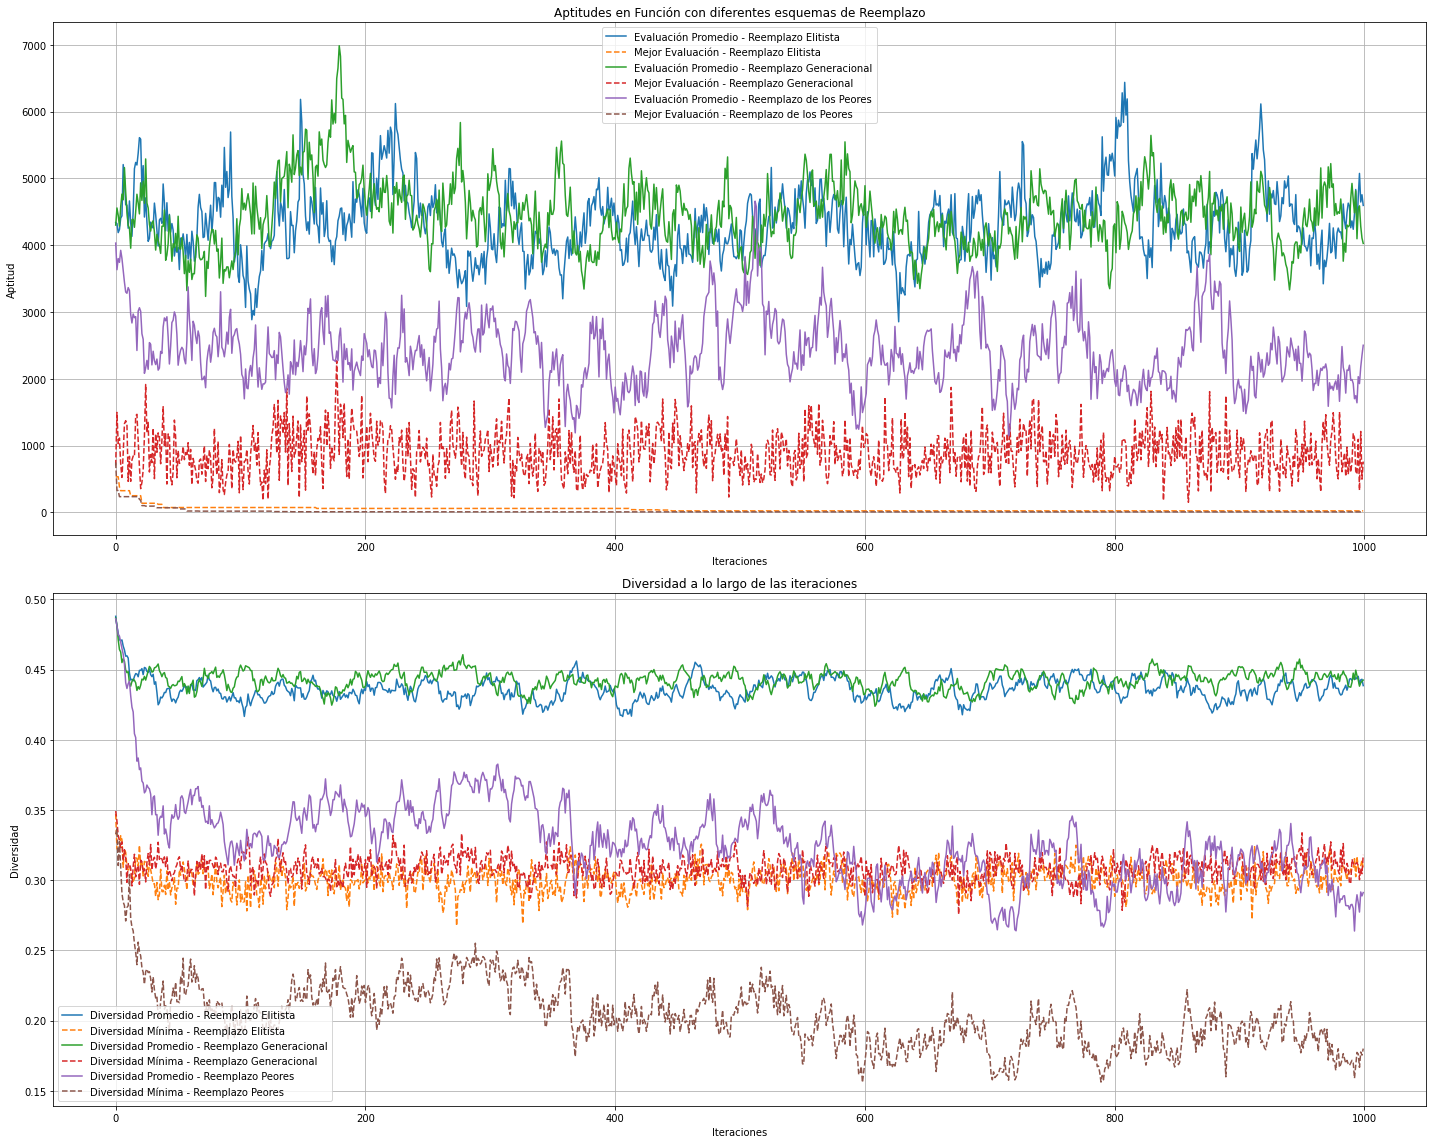

In [71]:
import matplotlib.pyplot as plt


aptitud_mejorE, aptitud_promedioE, diversidad_promE, diversidad_minE = AG_Reemplazo_Elitismo_Diversidad_Aptitud(funcion, intervalo, dimension, 
                    kindividuos, nBits, nCortes, 
                    probaMutacion, iteraciones)

aptitud_mejorG, aptitud_promedioG, diversidad_promG, diversidad_minG = AG_Reemplazo_Generacional_Diversidad_Aptitud(funcion, intervalo, dimension, 
                    kindividuos, nBits, nCortes, 
                    probaMutacion, iteraciones)

aptitud_mejorP, aptitud_promedioP, diversidad_promP, diversidad_minP = AG_Reemplazo_Peores_Diversidad_Aptitud(funcion, intervalo, dimension, 
                    kindividuos, nBits, nCortes, 
                    probaMutacion, iteraciones, fraccionReemplazo)


# Crear una figura y dos ejes
fig, axs = plt.subplots(2, 1, figsize=(20, 16))  # 2 filas, 1 columna

# Primera gráfica: Aptitudes
axs[0].plot(aptitud_promedioE, label='Evaluación Promedio - Reemplazo Elitista', linestyle='-')
axs[0].plot(aptitud_mejorE, label='Mejor Evaluación - Reemplazo Elitista ', linestyle='--')
axs[0].plot(aptitud_promedioG, label='Evaluación Promedio - Reemplazo Generacional', linestyle='-')
axs[0].plot(aptitud_mejorG, label='Mejor Evaluación - Reemplazo Generacional ', linestyle='--')
axs[0].plot(aptitud_promedioP, label='Evaluación Promedio - Reemplazo de los Peores', linestyle='-')
axs[0].plot(aptitud_mejorP, label='Mejor Evaluación - Reemplazo de los Peores ', linestyle='--')
axs[0].set_title('Aptitudes en Función con diferentes esquemas de Reemplazo')
axs[0].set_xlabel('Iteraciones')
axs[0].set_ylabel('Aptitud')
axs[0].legend()
axs[0].grid()

# Segunda gráfica: Diversidad
axs[1].plot(diversidad_promE, label='Diversidad Promedio - Reemplazo Elitista', linestyle='-')
axs[1].plot(diversidad_minE, label='Diversidad Mínima - Reemplazo Elitista', linestyle='--')
axs[1].plot(diversidad_promG, label='Diversidad Promedio - Reemplazo Generacional', linestyle='-')
axs[1].plot(diversidad_minG, label='Diversidad Mínima - Reemplazo Generacional', linestyle='--')
axs[1].plot(diversidad_promP, label='Diversidad Promedio - Reemplazo Peores', linestyle='-')
axs[1].plot(diversidad_minP, label='Diversidad Mínima - Reemplazo Peores', linestyle='--')
axs[1].set_title('Diversidad a lo largo de las iteraciones')
axs[1].set_xlabel('Iteraciones')
axs[1].set_ylabel('Diversidad')
axs[1].legend()
axs[1].grid()

# Ajustar el espacio entre las gráficas
plt.tight_layout()

    # Mostrar las gráficas
plt.show()


In [50]:
print([0,1,3])


[0, 1, 3]
